In [3]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [4]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 1000
generations = 1000
p_crossover = 0.7
p_mutation = 0.001
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size)

# Run optimzation and write to file
solution = ga.solve_tsp(tsp_data, p_crossover, p_mutation)
print(solution)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

IndexError: list index out of range

### Part 2: Path Finding Through Ant Colony Optimization

In [1]:
import time
import matplotlib as plt 
from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

# Please keep your parameters for the ACO easily changeable here
no_ants = 200 #number of ants
no_gen = 30 #number of generation
q = 1000
evap = 0.1
alpha = 1
beta = 5 

# Construct the optimization objects
maze = Maze.create_maze("./../data/medium_maze.txt")
spec = PathSpecification.read_coordinates("./../data/medium_coordinates.txt")
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, alpha, beta)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
prev_shortest_route, array = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
prev_shortest_route.write_to_file("./../data/medium_solution.txt")



# Print route size
print("Route size: " + str(prev_shortest_route.size()))


Ready reading maze file ./../data/medium_maze.txt
193
205
209
205
217
201
207
213
193
213
187
223
183
207
207
207
237
195
189
217
213
205
205
221
205
197
207
191
211
213
Time taken: 55.469
Route size: 183


In [2]:
array

[207,
 189,
 201,
 195,
 197,
 185,
 195,
 167,
 199,
 209,
 195,
 201,
 205,
 201,
 201,
 183,
 191,
 207,
 193,
 211,
 191,
 179,
 191,
 181,
 193,
 187,
 215,
 201,
 209,
 169]

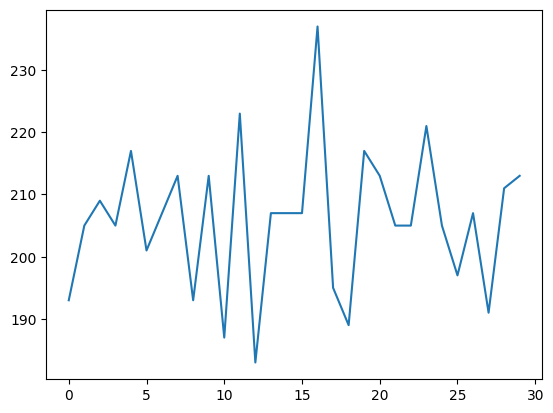

In [2]:
import matplotlib.pyplot as plt
plt.plot(range(len(array)),array)
plt.show()

### Synthesis

In [1]:
from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

NameError: name 'Maze' is not defined